## Nodos ocultos gaussianos: comprobaciones iniciales


In [1]:
import torch
import numpy as np
import torchvision.datasets as datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import h5py
import rbmg
from plyer import notification
from scipy.optimize import linear_sum_assignment


In [2]:
Ns = 10000
device = 'cpu'
mnist_trainset = datasets.MNIST('dataset/', train=True, download=True)
D = mnist_trainset.data[:Ns,:,:].reshape(Ns,28*28).float().to(device) / 255.0
D = (D > 0.3) * 1.0
D = D.t()
time = [0,1,2]
for n in range (1,40):
    for m in range (1,40):
        t = 2**n + 2**m
        time.append(t)

time = np.array(list(set(time)))
time = np.sort(time)


In [21]:
D.shape

torch.Size([784, 10000])

In [4]:
n_vis = D.shape[0]
n_hid = 500
dtype = torch.float
batch_size = 100
rdm = True
regu = False
lr = 1e-3
gibbs_steps = 10
epoch_max = 100
T = 0



filename = 'files/RDMG_n500_b100_l01_k10_e100.h5'
f = h5py.File(filename,'w') #w - escribir
f.create_dataset('alltime',data=time)
f.close()

myRBMG = rbmg.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

In [5]:
myRBMG.SetVisBias(D)

myRBMG.train(D)

It =  0 loss tensor(18.3941)
It =  1 loss tensor(9.2000)
It =  2 loss tensor(6.1305)
It =  3 loss tensor(4.6000)
It =  4 loss tensor(3.6773)
It =  5 loss tensor(3.0682)
It =  6 loss tensor(2.6306)
It =  7 loss tensor(2.3013)
It =  8 loss tensor(2.0515)
It =  9 loss tensor(1.8530)
It =  10 loss tensor(1.6913)
It =  11 loss tensor(1.5520)
It =  12 loss tensor(1.4341)
It =  13 loss tensor(1.3343)
It =  14 loss tensor(1.2450)
It =  15 loss tensor(1.1728)
It =  16 loss tensor(1.1039)
It =  17 loss tensor(1.0451)
It =  18 loss tensor(0.9938)
It =  19 loss tensor(0.9475)
It =  20 loss tensor(0.9021)
It =  21 loss tensor(0.8655)
It =  22 loss tensor(0.8278)
It =  23 loss tensor(0.7914)
It =  24 loss tensor(0.7606)
It =  25 loss tensor(0.7360)
It =  26 loss tensor(0.7054)
It =  27 loss tensor(0.6823)
It =  28 loss tensor(0.6581)
It =  29 loss tensor(0.6367)
It =  30 loss tensor(0.6172)
It =  31 loss tensor(0.5967)
It =  32 loss tensor(0.5785)
It =  33 loss tensor(0.5602)
It =  34 loss tensor(0.

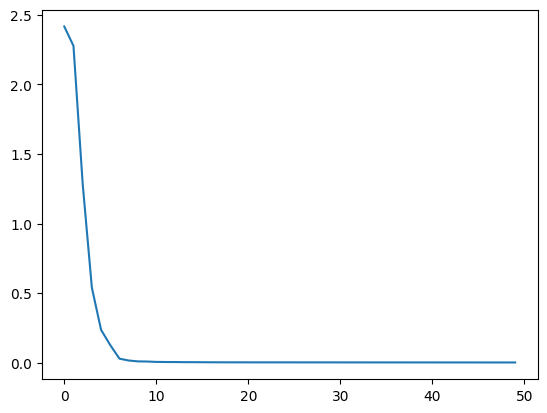

In [23]:
U,Σ,V=torch.svd(myRBMG.W)

plt.plot(Σ)

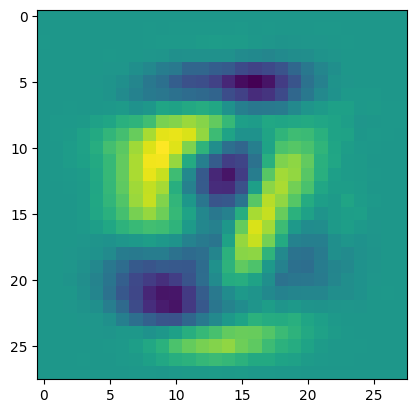

In [26]:
plt.imshow(V[:,1].reshape(28,28))

In [16]:
C=torch.cov(D)
λ,A=torch.linalg.eig(C)
print(C.shape)
A=A.float()

torch.Size([784, 784])


/tmp/ipykernel_8140/3267285378.py:4: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:299.)
  A=A.float()


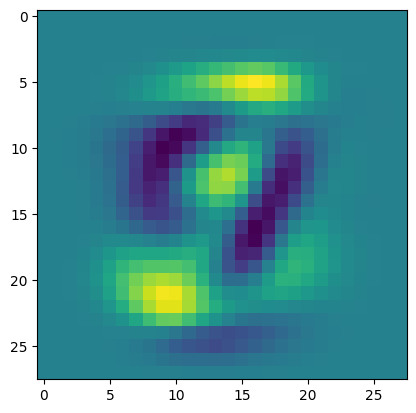

In [27]:
plt.imshow(A[:,1].reshape(28,28))

In [ ]:
myRBMG.PlotSampling(10)

/home/laura/Fisicas/TFG/Codigo/main/rbmg.py:214: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  W = torch.tensor(f['W'+str(ep)])


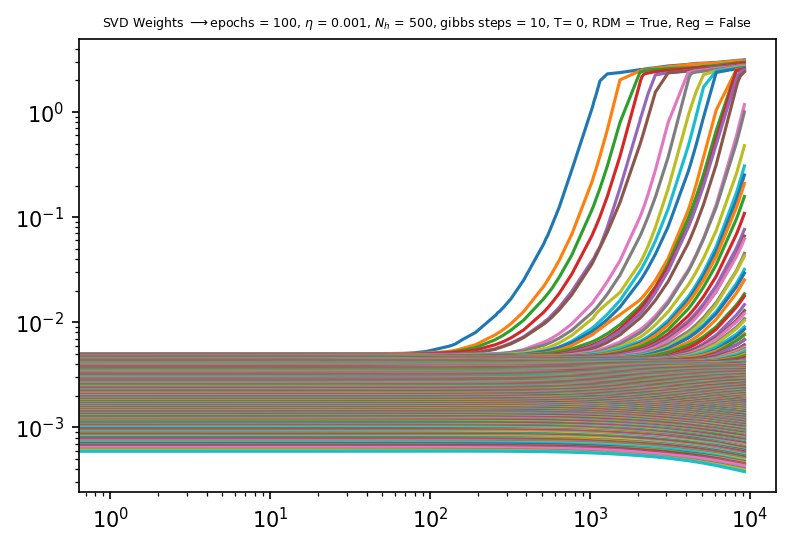

In [6]:
myRBMG.PlotW()

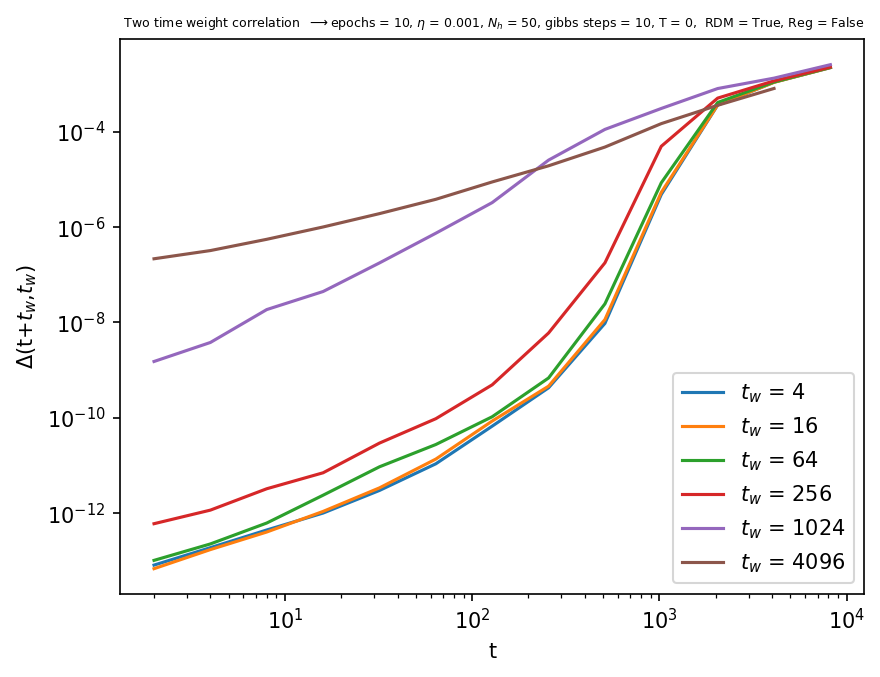

In [13]:
myRBMG.PlotMSDW(False)

In [7]:
n_vis = D.shape[0]
n_hid = 500
dtype = torch.float
batch_size = 100
rdm = True
regu = False
lr = 1e-3
gibbs_steps = 10
epoch_max = 1000
T = 0



filename = 'files/RDMG_n500_b100_l01_k10_ek.h5'
f = h5py.File(filename,'w') #w - escribir
f.create_dataset('alltime',data=time)
f.close()

myRBMG2 = rbmg.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

In [8]:
myRBMG2.SetVisBias(D)

myRBMG2.train(D)

It =  0 loss tensor(18.3761)
It =  1 loss tensor(9.1934)
It =  2 loss tensor(6.1244)
It =  3 loss tensor(4.6000)
It =  4 loss tensor(3.6772)
It =  5 loss tensor(3.0676)
It =  6 loss tensor(2.6260)
It =  7 loss tensor(2.3007)
It =  8 loss tensor(2.0515)
It =  9 loss tensor(1.8545)
It =  10 loss tensor(1.6906)
It =  11 loss tensor(1.5480)
It =  12 loss tensor(1.4344)
It =  13 loss tensor(1.3342)
It =  14 loss tensor(1.2433)
It =  15 loss tensor(1.1697)
It =  16 loss tensor(1.1035)
It =  17 loss tensor(1.0451)
It =  18 loss tensor(0.9929)
It =  19 loss tensor(0.9462)
It =  20 loss tensor(0.9051)
It =  21 loss tensor(0.8623)
It =  22 loss tensor(0.8281)
It =  23 loss tensor(0.7899)
It =  24 loss tensor(0.7600)
It =  25 loss tensor(0.7324)
It =  26 loss tensor(0.7046)
It =  27 loss tensor(0.6806)
It =  28 loss tensor(0.6580)
It =  29 loss tensor(0.6370)
It =  30 loss tensor(0.6152)
It =  31 loss tensor(0.5967)
It =  32 loss tensor(0.5782)
It =  33 loss tensor(0.5610)
It =  34 loss tensor(0.

It =  277 loss tensor(0.0671)
It =  278 loss tensor(0.0669)
It =  279 loss tensor(0.0667)
It =  280 loss tensor(0.0664)
It =  281 loss tensor(0.0663)
It =  282 loss tensor(0.0658)
It =  283 loss tensor(0.0658)
It =  284 loss tensor(0.0654)
It =  285 loss tensor(0.0655)
It =  286 loss tensor(0.0651)
It =  287 loss tensor(0.0648)
It =  288 loss tensor(0.0648)
It =  289 loss tensor(0.0643)
It =  290 loss tensor(0.0642)
It =  291 loss tensor(0.0640)
It =  292 loss tensor(0.0638)
It =  293 loss tensor(0.0635)
It =  294 loss tensor(0.0632)
It =  295 loss tensor(0.0631)
It =  296 loss tensor(0.0628)
It =  297 loss tensor(0.0627)
It =  298 loss tensor(0.0625)
It =  299 loss tensor(0.0622)
It =  300 loss tensor(0.0620)
It =  301 loss tensor(0.0617)
It =  302 loss tensor(0.0615)
It =  303 loss tensor(0.0613)
It =  304 loss tensor(0.0612)
It =  305 loss tensor(0.0609)
It =  306 loss tensor(0.0608)
It =  307 loss tensor(0.0607)
It =  308 loss tensor(0.0603)
It =  309 loss tensor(0.0602)
It =  310 

It =  551 loss tensor(0.0334)
It =  552 loss tensor(0.0334)
It =  553 loss tensor(0.0332)
It =  554 loss tensor(0.0332)
It =  555 loss tensor(0.0331)
It =  556 loss tensor(0.0331)
It =  557 loss tensor(0.0330)
It =  558 loss tensor(0.0330)
It =  559 loss tensor(0.0329)
It =  560 loss tensor(0.0329)
It =  561 loss tensor(0.0328)
It =  562 loss tensor(0.0327)
It =  563 loss tensor(0.0327)
It =  564 loss tensor(0.0327)
It =  565 loss tensor(0.0325)
It =  566 loss tensor(0.0325)
It =  567 loss tensor(0.0324)
It =  568 loss tensor(0.0324)
It =  569 loss tensor(0.0323)
It =  570 loss tensor(0.0324)
It =  571 loss tensor(0.0322)
It =  572 loss tensor(0.0322)
It =  573 loss tensor(0.0322)
It =  574 loss tensor(0.0321)
It =  575 loss tensor(0.0320)
It =  576 loss tensor(0.0319)
It =  577 loss tensor(0.0319)
It =  578 loss tensor(0.0317)
It =  579 loss tensor(0.0318)
It =  580 loss tensor(0.0318)
It =  581 loss tensor(0.0317)
It =  582 loss tensor(0.0317)
It =  583 loss tensor(0.0316)
It =  584 

It =  825 loss tensor(0.0223)
It =  826 loss tensor(0.0223)
It =  827 loss tensor(0.0222)
It =  828 loss tensor(0.0223)
It =  829 loss tensor(0.0222)
It =  830 loss tensor(0.0222)
It =  831 loss tensor(0.0222)
It =  832 loss tensor(0.0221)
It =  833 loss tensor(0.0222)
It =  834 loss tensor(0.0220)
It =  835 loss tensor(0.0221)
It =  836 loss tensor(0.0219)
It =  837 loss tensor(0.0219)
It =  838 loss tensor(0.0220)
It =  839 loss tensor(0.0220)
It =  840 loss tensor(0.0219)
It =  841 loss tensor(0.0218)
It =  842 loss tensor(0.0218)
It =  843 loss tensor(0.0218)
It =  844 loss tensor(0.0218)
It =  845 loss tensor(0.0218)
It =  846 loss tensor(0.0218)
It =  847 loss tensor(0.0217)
It =  848 loss tensor(0.0217)
It =  849 loss tensor(0.0217)
It =  850 loss tensor(0.0216)
It =  851 loss tensor(0.0216)
It =  852 loss tensor(0.0216)
It =  853 loss tensor(0.0215)
It =  854 loss tensor(0.0216)
It =  855 loss tensor(0.0215)
It =  856 loss tensor(0.0214)
It =  857 loss tensor(0.0215)
It =  858 

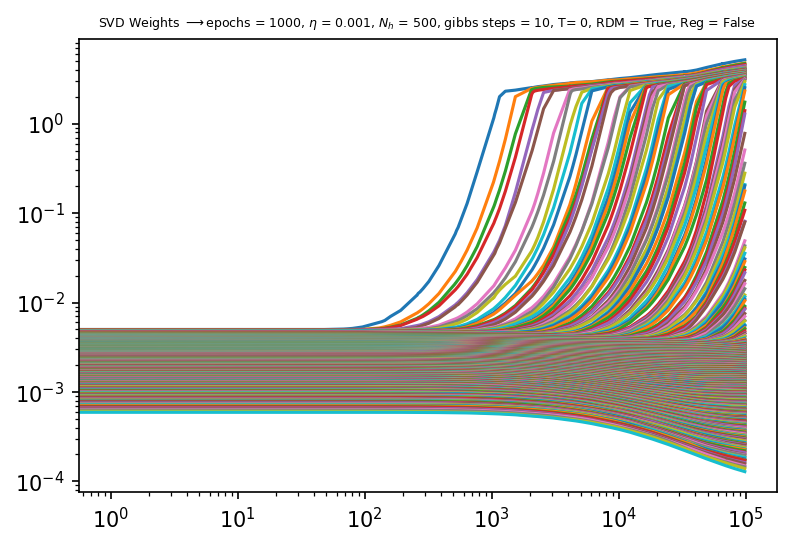

In [9]:
myRBMG2.PlotW()

## RBMG con 1 hidden node entrenado con mnist

In [10]:
n_vis = D.shape[0]
n_hid = 1
dtype = torch.float
batch_size = 784
rdm = True
regu = False
lr = 1e-3
gibbs_steps = 10
epoch_max = 1000
T = 0

filename = 'files/RDMG_n1_b784_l01_k10_ek.h5'
f = h5py.File(filename,'w') #w - escribir
f.create_dataset('alltime',data=time)
f.close()

myRBMG = rbmg.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

In [11]:
myRBMG.SetVisBias(D)

myRBMG.train(D)

It =  0 loss tensor(2.2054)
It =  1 loss tensor(1.1027)
It =  2 loss tensor(0.7344)
It =  3 loss tensor(0.5515)
It =  4 loss tensor(0.4416)
It =  5 loss tensor(0.3676)
It =  6 loss tensor(0.3150)
It =  7 loss tensor(0.2757)
It =  8 loss tensor(0.2451)
It =  9 loss tensor(0.2205)
It =  10 loss tensor(0.2006)
It =  11 loss tensor(0.1836)
It =  12 loss tensor(0.1695)
It =  13 loss tensor(0.1575)
It =  14 loss tensor(0.1471)
It =  15 loss tensor(0.1379)
It =  16 loss tensor(0.1296)
It =  17 loss tensor(0.1225)
It =  18 loss tensor(0.1160)
It =  19 loss tensor(0.1102)
It =  20 loss tensor(0.1050)
It =  21 loss tensor(0.1001)
It =  22 loss tensor(0.0959)
It =  23 loss tensor(0.0919)
It =  24 loss tensor(0.0883)
It =  25 loss tensor(0.0849)
It =  26 loss tensor(0.0816)
It =  27 loss tensor(0.0787)
It =  28 loss tensor(0.0760)
It =  29 loss tensor(0.0735)
It =  30 loss tensor(0.0711)
It =  31 loss tensor(0.0689)
It =  32 loss tensor(0.0669)
It =  33 loss tensor(0.0649)
It =  34 loss tensor(0.0

It =  277 loss tensor(0.0081)
It =  278 loss tensor(0.0080)
It =  279 loss tensor(0.0080)
It =  280 loss tensor(0.0080)
It =  281 loss tensor(0.0079)
It =  282 loss tensor(0.0079)
It =  283 loss tensor(0.0079)
It =  284 loss tensor(0.0079)
It =  285 loss tensor(0.0078)
It =  286 loss tensor(0.0078)
It =  287 loss tensor(0.0078)
It =  288 loss tensor(0.0078)
It =  289 loss tensor(0.0077)
It =  290 loss tensor(0.0077)
It =  291 loss tensor(0.0077)
It =  292 loss tensor(0.0076)
It =  293 loss tensor(0.0076)
It =  294 loss tensor(0.0076)
It =  295 loss tensor(0.0076)
It =  296 loss tensor(0.0076)
It =  297 loss tensor(0.0075)
It =  298 loss tensor(0.0075)
It =  299 loss tensor(0.0075)
It =  300 loss tensor(0.0074)
It =  301 loss tensor(0.0074)
It =  302 loss tensor(0.0074)
It =  303 loss tensor(0.0074)
It =  304 loss tensor(0.0074)
It =  305 loss tensor(0.0073)
It =  306 loss tensor(0.0073)
It =  307 loss tensor(0.0073)
It =  308 loss tensor(0.0073)
It =  309 loss tensor(0.0072)
It =  310 

It =  551 loss tensor(0.0041)
It =  552 loss tensor(0.0040)
It =  553 loss tensor(0.0040)
It =  554 loss tensor(0.0040)
It =  555 loss tensor(0.0040)
It =  556 loss tensor(0.0040)
It =  557 loss tensor(0.0040)
It =  558 loss tensor(0.0040)
It =  559 loss tensor(0.0040)
It =  560 loss tensor(0.0040)
It =  561 loss tensor(0.0040)
It =  562 loss tensor(0.0040)
It =  563 loss tensor(0.0040)
It =  564 loss tensor(0.0040)
It =  565 loss tensor(0.0040)
It =  566 loss tensor(0.0039)
It =  567 loss tensor(0.0039)
It =  568 loss tensor(0.0039)
It =  569 loss tensor(0.0039)
It =  570 loss tensor(0.0039)
It =  571 loss tensor(0.0039)
It =  572 loss tensor(0.0039)
It =  573 loss tensor(0.0039)
It =  574 loss tensor(0.0039)
It =  575 loss tensor(0.0039)
It =  576 loss tensor(0.0039)
It =  577 loss tensor(0.0039)
It =  578 loss tensor(0.0039)
It =  579 loss tensor(0.0039)
It =  580 loss tensor(0.0038)
It =  581 loss tensor(0.0038)
It =  582 loss tensor(0.0038)
It =  583 loss tensor(0.0038)
It =  584 

It =  825 loss tensor(0.0027)
It =  826 loss tensor(0.0027)
It =  827 loss tensor(0.0027)
It =  828 loss tensor(0.0027)
It =  829 loss tensor(0.0027)
It =  830 loss tensor(0.0027)
It =  831 loss tensor(0.0027)
It =  832 loss tensor(0.0027)
It =  833 loss tensor(0.0027)
It =  834 loss tensor(0.0027)
It =  835 loss tensor(0.0027)
It =  836 loss tensor(0.0027)
It =  837 loss tensor(0.0027)
It =  838 loss tensor(0.0027)
It =  839 loss tensor(0.0027)
It =  840 loss tensor(0.0027)
It =  841 loss tensor(0.0027)
It =  842 loss tensor(0.0026)
It =  843 loss tensor(0.0026)
It =  844 loss tensor(0.0026)
It =  845 loss tensor(0.0026)
It =  846 loss tensor(0.0026)
It =  847 loss tensor(0.0026)
It =  848 loss tensor(0.0026)
It =  849 loss tensor(0.0026)
It =  850 loss tensor(0.0026)
It =  851 loss tensor(0.0026)
It =  852 loss tensor(0.0026)
It =  853 loss tensor(0.0026)
It =  854 loss tensor(0.0026)
It =  855 loss tensor(0.0026)
It =  856 loss tensor(0.0026)
It =  857 loss tensor(0.0026)
It =  858 

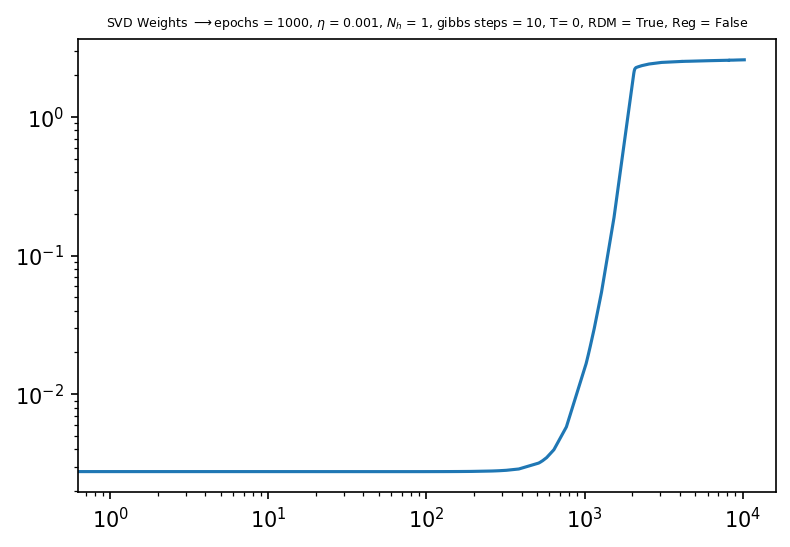

In [12]:
myRBMG.PlotW()